In [8]:
import PIL 
from PIL import Image 
import pandas as pd 
import numpy as np
batch_size = 16 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import os
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import numpy as np
#The dimension of the images we are going to define is 500x500 
test_path = '/home/stephenvu/Jupyter Notebook/646 Asissngment 2/train/'


# 1. PRE-PROCESSING DATA

In [8]:
labels = ['COVID', 'Normal','Pneumonia']
img_size = 50
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return data
    #return np.array(data)

In [9]:
data = get_data(test_path)

In [19]:
data_ = np.array(data)
data_.shape

<ipython-input-19-2f48b2e4b69e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_ = np.array(data)


(15153, 2)

In [9]:
train = pd.read_hdf('data.h5')
train.data.shape


(15153,)

In [3]:
train.label.values

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [10]:
data = pd.DataFrame(train,columns=['data','label'])
#data.to_excel('data.xlsx')


In [11]:
X = data['data'].values
y = data['label'].values
#For ML 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
#FOR DL
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)
# X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33)
y_train_label = []

for i in y_train: 
    if i == 0:
        y_train_label.append("COVID")
    if i == 1:
        y_train_label.append("Normal")
    if i == 2:
        y_train_label.append("Pneumonia")
np.unique(y_train)


array([0, 1, 2], dtype=object)

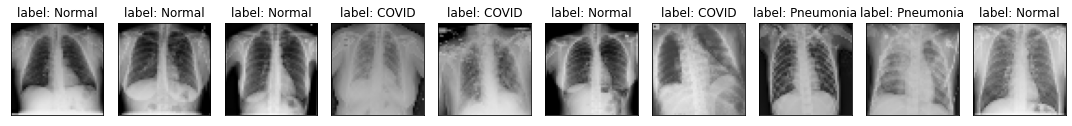

In [6]:
fig = plt.figure(figsize=(15,10))
label = ""
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(X_train[i])

    ax.set_title('label: '+str(y_train_label[i]))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()

# 2. METHODS:
## A. DEEPLEARNING - CNN: 

In [6]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,ZeroPadding2D,Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [45]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
model.save('/home/stephenvu/Jupyter Notebook/646 Asissngment 2/')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 49, 49, 32)        416       
_________________________________________________________________
activation_12 (Activation)   (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 32)        4128      
_________________________________________________________________
activation_13 (Activation)   (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)       

In [46]:
# from tensorflow.keras.utils import plot_model
# plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [7]:
x_train_tensor=[]
for i in X_train:
    x_train_tensor.append(tf.convert_to_tensor(i,dtype='float32'))
x_test_tensor=[]
for i in X_test:
    x_test_tensor.append(tf.convert_to_tensor(i,dtype='float32'))
y_train_tensor=[]
for i in y_train:
    y_train_tensor.append(tf.convert_to_tensor(i))

y_test_tensor=[]
for i in y_test:
    y_test_tensor.append(tf.convert_to_tensor(i))


In [8]:
print("x_train:{0}, y_train:{1}, x_test:{2}, y_test:{3}".format(len(x_train_tensor),len(y_train_tensor),len(x_test_tensor),len(y_test_tensor)))
x_list=np.array(x_train_tensor)
xtest_list=np.array(x_test_tensor)
y_list=np.array(y_train_tensor)
y_list=pd.get_dummies(y_list).values
ytest_list=np.array(y_test_tensor)
ytest_list=pd.get_dummies(ytest_list).values
x_train=tf.convert_to_tensor(x_list)
x_test=tf.convert_to_tensor(xtest_list)
y1_train=tf.convert_to_tensor(y_list)
y1_test=tf.convert_to_tensor(ytest_list)


x_train:10152, y_train:10152, x_test:5001, y_test:5001


In [49]:
history=model.fit(x_train, y1_train, shuffle=True, epochs=10, validation_data=(x_test, y1_test))              

Epoch 1/10


ValueError: in user code:

    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/stephenvu/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 3) and (None, 12) are incompatible


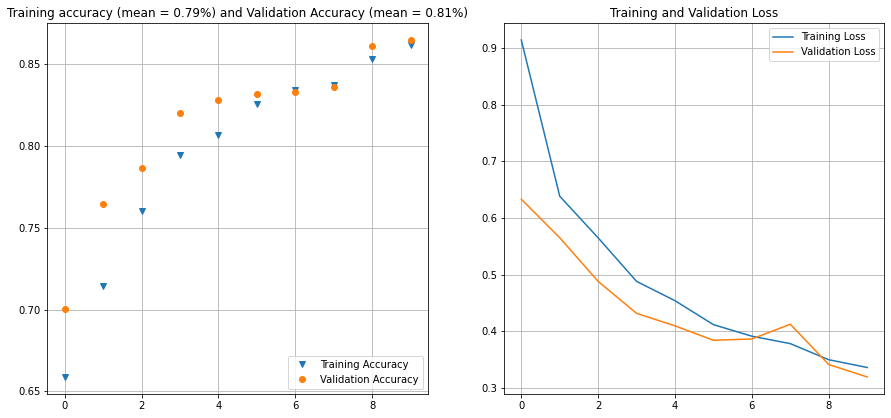

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.title('CNN')
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc,'v', label='Training Accuracy')
plt.plot(epochs_range, val_acc,'o', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training accuracy (mean = {0:.2f}%) and Validation Accuracy (mean = {1:.2f}%)'.format(np.mean(history.history['accuracy']),np.mean(history.history['val_accuracy'])))
plt.grid()
plt.subplot(2, 2, 2)
# yerr = np.linspace(0.05, 0.2, 10)
# plt.errorbar(epochs_range, loss, yerr=yerr, label='both limits (default)')

# plt.errorbar(epochs_range, loss, yerr=yerr, uplims=True, label='uplims=True')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.grid()
plt.show()

In [22]:
y_pred_cnn = model.predict(x_test)


In [66]:
y_round=np.round(y_pred_cnn)

In [118]:
converted_y=[]
for i in y_round:
    converted_y.append(np.argmax(i))
converted_y=np.array(converted_y)
converted_y.shape
np.unique(y_test)

array([0, 1, 2], dtype=object)

In [117]:
from mlxtend.plotting import plot_decision_regions
np.unique(converted_y)

array([0, 1, 2])

In [134]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(a,converted_y)

In [20]:
a = [] 
for i in y_test:
    a.append(i)
a = np.array(a)

In [21]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

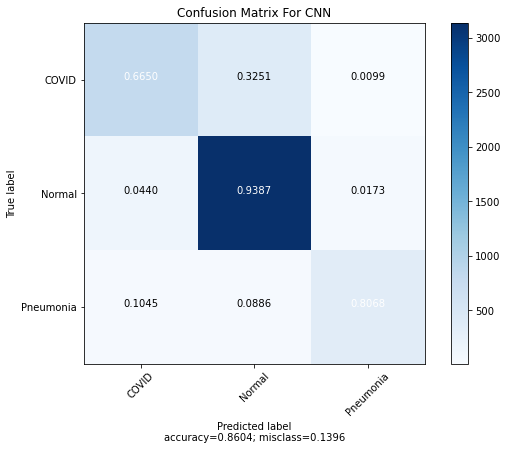

In [136]:
plot_confusion_matrix(cm,target_names=['COVID','Normal','Pneumonia'],title='Confusion Matrix For CNN')

# B. ML-BASED: Random Forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [38]:
# clf  = RandomForestClassifier(n_estimators=10)
x_train_flat=[]
for i in X_train:
    x_train_flat.append(i.flatten())
x_test_flat=[]
for i in X_test:
    x_test_flat.append(i.flatten())
y_train_binary = []
for i in y_train: 
    if i>0: 
        y_train_binary.append(1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_flat, y_train)

In [ ]:
# # from sklearn.utils import shuffle
# # X_ = X.reshape(X.shape[0]*X.shape[1],X.shape[2]).T
# # y_ = y.reshape(y.shape[0],)
# # X, y = shuffle(X, y, random_state=42)
# x_train_flat=[]
# for i in X_train:
#     x_train_flat.append(i.flatten())
# x_test_flat=[]
# for i in X_test:
#     x_test_flat.append(i.flatten())

In [28]:
# clf.fit(x_train_flat, y_train)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,plot_precision_recall_curve,plot_roc_curve,classification_report, confusion_matrix

preds = rf.predict(x_test_flat)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.8918216356728654


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from pprint import pprint
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 15, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier(n_estimators=10)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(x_train_flat, y_train)

In [ ]:
a =pd.DataFrame(x_train_flat)

Error: Session cannot generate requests

## C. ML-BASED SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 

clf_svm = svm.SVC()
grid = GridSearchCV(clf_svm, param_grid, refit = True, verbose = 3)
clf_svm.fit(x_train_flat, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

NameError: name 'x_train_flat' is not defined

In [ ]:

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

Accuracy: 0.8958208358328335


## D. VGG network: 

In [13]:
vgg = Sequential()
vgg.add(ZeroPadding2D((1,1),input_shape=(50,50, 3)))
vgg.add(Conv2D(32, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(32, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
# vgg.add(Conv2D(128, (7, 7), activation='relu'))
# vgg.add(Dropout(0.5))
# vgg.add(Conv2D(128, (1, 1), activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Conv2D(3, (1, 1)))
vgg.add(Flatten())
vgg.add(Dense(64))
vgg.add(Activation('relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(3))
vgg.add(Activation('softmax'))
vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
vgg_history=vgg.fit(x_train, y1_train, shuffle=False, epochs=10, validation_data=(x_test, y1_test))

Epoch 1/10
318/318 [==============================] - 85s 264ms/step - loss: 0.6829 - accuracy: 0.6682 - val_loss: 0.5271 - val_accuracy: 0.7417
Epoch 2/10
318/318 [==============================] - 86s 270ms/step - loss: 0.5071 - accuracy: 0.7668 - val_loss: 0.3985 - val_accuracy: 0.8446
Epoch 3/10
318/318 [==============================] - 87s 273ms/step - loss: 0.3911 - accuracy: 0.8389 - val_loss: 0.2994 - val_accuracy: 0.8786
Epoch 4/10
318/318 [==============================] - 86s 271ms/step - loss: 0.3381 - accuracy: 0.8648 - val_loss: 0.3713 - val_accuracy: 0.8412
Epoch 5/10
318/318 [==============================] - 87s 273ms/step - loss: 0.2978 - accuracy: 0.8874 - val_loss: 0.3022 - val_accuracy: 0.8762
Epoch 6/10
318/318 [==============================] - 86s 272ms/step - loss: 0.2481 - accuracy: 0.9075 - val_loss: 0.3344 - val_accuracy: 0.8826
Epoch 7/10
318/318 [==============================] - 87s 272ms/step - loss: 0.2793 - accuracy: 0.8958 - val_loss: 0.2492 - val_ac

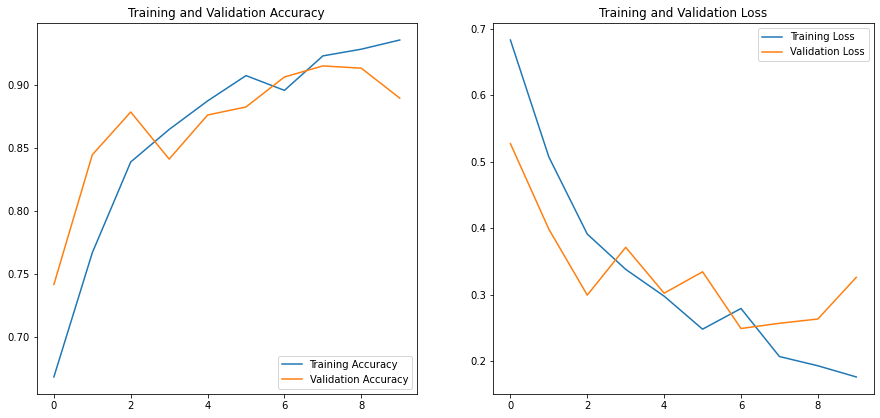

In [14]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
predictions = vgg.predict(x_test)
predictions

array([[5.9279096e-03, 1.4843120e-02, 9.7922897e-01],
       [7.4709149e-04, 9.9925286e-01, 1.2064300e-20],
       [1.3352807e-01, 8.6647159e-01, 3.3355818e-07],
       ...,
       [9.2649275e-01, 7.0916973e-02, 2.5902940e-03],
       [5.7935331e-02, 5.5902654e-01, 3.8303813e-01],
       [9.9659473e-01, 3.3605397e-03, 4.4728997e-05]], dtype=float32)

In [17]:
check = []
for i in predictions:
    check.append(np.argmax(i))
check = np.array(check)

In [16]:
predictions[0]

array([0.00592791, 0.01484312, 0.979229  ], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(a,check)

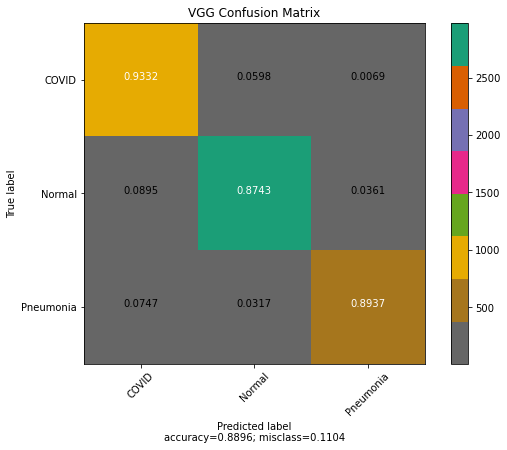

In [28]:
plot_confusion_matrix(cm2,target_names=['COVID','Normal','Pneumonia'],title='VGG Confusion Matrix', cmap='Dark2_r')

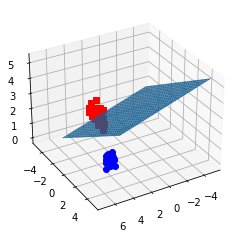

In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = LogisticRegression()
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [4]:
clf.

RandomForestClassifier(n_estimators=3)

In [24]:
Y[]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
X_test[0].shape

(50, 50, 3)

In [25]:
y_test

array([1, 0, 0, ..., 1, 1, 1], dtype=object)